# Discretization

In this demo you can see the effect of the different discretization methods on zero-pole plots and bode-plots.

In [1]:
from control import *
from control import bode
%matplotlib inline 
from IPython.html.widgets import *
from Discretization import *

:0: FutureWarning: IPython widgets are experimental and may change in the future.


# Forward Euler

This method subsitutes every s in the continuous-time transfer function to $$\frac{z-1}{T_s},$$ where $T_s$ is the sampling time.

The continuous-time transfer function is : 
  1
-----
s + 1

and the discrete-time transfer function is:  
  1.5
-------
z + 0.5

dt = 1.5



<function __main__.draw>

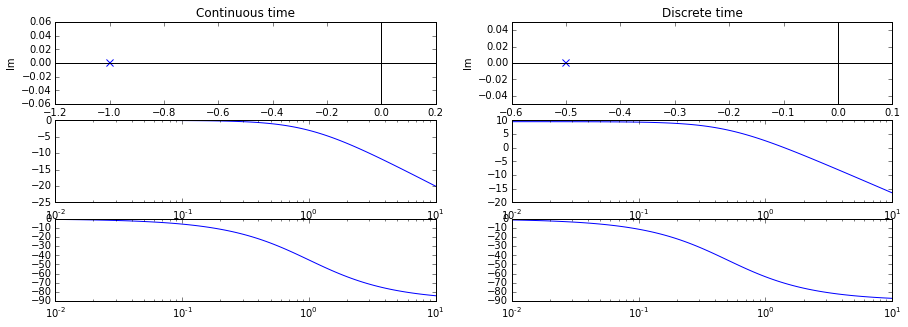

In [6]:
def zp(Ts,sys):
    sysd=sys.sample(Ts,'euler')
    print 'The continuous-time transfer function is :', sys
    print 'and the discrete-time transfer function is: ', sysd
    plt.subplot(3,2,1)
    zp_plot(sys)
    plt.title('Continuous time')
    plt.subplot(3,2,2)
    zp_plot(sysd)
    plt.title('Discrete time')
    
def bode_plot(Ts,sys):
    #continuous
    n = asarray(sys.num)[0][0]
    d = asarray(sys.den)[0][0]
    s = signal.lti(n,d)
    w, mag, phase = s.bode()
    plt.subplot(323)
    plt.semilogx(w, mag)
    plt.subplot(325)
    plt.semilogx(w, phase)
    #discrete
    sysd=sys.sample(Ts,'euler')
    nd = asarray(sysd.num)[0][0]
    dd = asarray(sysd.den)[0][0]
    sd = signal.lti(nd,dd)
    wd, magd, phased = sd.bode()
    plt.subplot(324)
    plt.semilogx(wd, magd)
    plt.subplot(326)
    plt.semilogx(wd, phased)

def draw(Ts):
    zp(Ts,sys)
    bode_plot(Ts,sys)

go = False
while go == False:
    Num,Denom = init()
    sys = TransferFunction(Num,Denom)
    print 'The transfer function is :', sys
    go = check()
interact(draw,Ts=(0.1,3,0.1))

# Backward Euler

This method substitutes every s in the continuous-time transfer function with $$\frac{z-1}{T_s z},$$ where $T_s$ is the sampling time.

The continuous-time transfer function is : 
  1
-----
s + 1

and the discrete-time transfer function is:  
 0.6 z
-------
z - 0.4

dt = 1.5



<function __main__.draw>

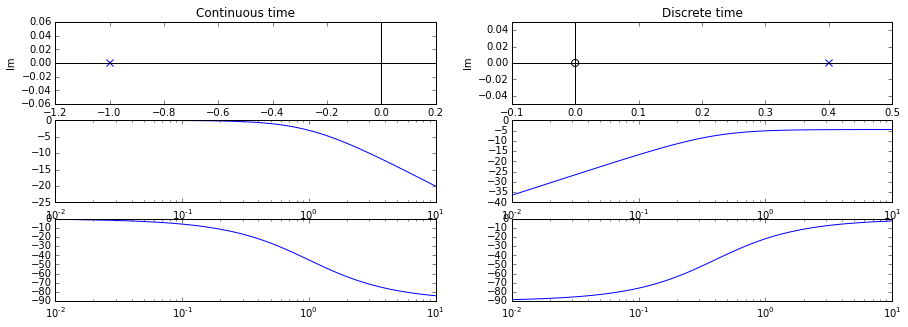

In [7]:
def zp(Ts,sys):
    sysd=sys.sample(Ts,'backward_diff')
    print 'The continuous-time transfer function is :', sys
    print 'and the discrete-time transfer function is: ', sysd
    plt.subplot(3,2,1)
    zp_plot(sys)
    plt.title('Continuous time')
    plt.subplot(3,2,2)
    zp_plot(sysd)
    plt.title('Discrete time')
    
def bode_plot(Ts,sys):
    #continuous
    n = asarray(sys.num)[0][0]
    d = asarray(sys.den)[0][0]
    s = signal.lti(n,d)
    w, mag, phase = s.bode()
    plt.subplot(323)
    plt.semilogx(w, mag)
    plt.subplot(325)
    plt.semilogx(w, phase)
    #discrete
    sysd=sys.sample(Ts,'backward_diff')
    nd = asarray(sysd.num)[0][0]
    dd = asarray(sysd.den)[0][0]
    sd = signal.lti(nd,dd)
    wd, magd, phased = sd.bode()
    plt.subplot(324)
    plt.semilogx(wd, magd)
    plt.subplot(326)
    plt.semilogx(wd, phased)

def draw(Ts):
    zp(Ts,sys)
    bode_plot(Ts,sys)

go = False
while go == False:
    Num,Denom = init()
    sys = TransferFunction(Num,Denom)
    print 'The transfer function is :', sys
    go = check()
interact(draw,Ts=(0.1,3,0.1))

# Bilinear transform

The bilinear transform without prewarping substitutes every s in the continuous-time transfer function with $$\frac{2}{T_s} \frac{z-1}{z+1},$$ where $T_s$ is the sampling time.<br />
The bilinear transform with prewarping (and prewarping frequence $\omega_0$) every s is substituted with $$\frac{\omega_0}{tan\Big(\frac{\omega_0T_s}{2}\Big)} \frac{z-1}{z+1}.$$

The continuous-time transfer function is : 
  1
-----
s + 1

and the discrete-time transfer function is:  
0.4286 z + 0.4286
-----------------
    z - 0.1429

dt = 1.5



<function __main__.draw>

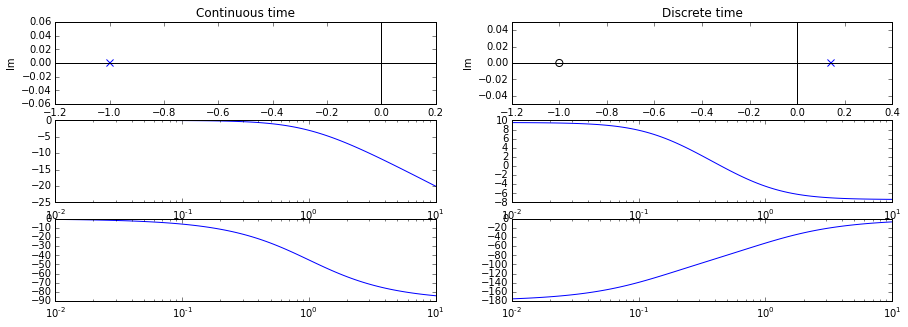

In [8]:
def zp(Ts,sys):
    sysd = sys.sample(Ts,'bilinear')
    if prew == 'Y' or prew == 'y':
        f = input('What is the prewarping frequency? ')
        factor = (f/(tan(f*Ts/2)))*(Ts/2)
        sysd = sysd * factor
    print 'The continuous-time transfer function is :', sys
    print 'and the discrete-time transfer function is: ', sysd
    plt.subplot(3,2,1)
    zp_plot(sys)
    plt.title('Continuous time')
    plt.subplot(3,2,2)
    zp_plot(sysd)
    plt.title('Discrete time')
    
def bode_plot(Ts,sys):
    #continuous
    n = asarray(sys.num)[0][0]
    d = asarray(sys.den)[0][0]
    s = signal.lti(n,d)
    w, mag, phase = s.bode()
    plt.subplot(323)
    plt.semilogx(w, mag)
    plt.subplot(325)
    plt.semilogx(w, phase)
    #discrete
    sysd = sys.sample(Ts,'bilinear')
    if prew == 'Y' or prew == 'y':
        f = input('Enter the prewarping frequency again. ')
        factor = (f/(tan(f*Ts/2)))*(Ts/2)
        sysd = sysd * factor
    nd = asarray(sysd.num)[0][0]
    dd = asarray(sysd.den)[0][0]
    sd = signal.lti(nd,dd)
    wd, magd, phased = sd.bode()
    plt.subplot(324)
    plt.semilogx(wd, magd)
    plt.subplot(326)
    plt.semilogx(wd, phased)

def draw(Ts):
    zp(Ts,sys)
    bode_plot(Ts,sys)

go = False
while go == False:
    Num,Denom = init()
    sys = TransferFunction(Num,Denom)
    print 'The transfer function is :', sys
    go = check()
prew = None
while prew != 'Y' and prew != 'y' and prew != 'N' and prew != 'n':
    prew = raw_input('With prewarping? (Y/N) ')
interact(draw,Ts=(0.1,3,0.1))

# Impulse invariant method

For the impulse invariant method, you need to take the Partial fraction decomposition of the continuous-time transfer function, and each of the terms has to be converted using the next table:<br />

  |$H_c(s)$                     | $H_d(z)$                                     |
  |:------------------------------:|:--------------------------------------------:|
  |$\qquad \frac{c}{s-b} \qquad$              | $\qquad \frac{T_scz}{z-a} \qquad$                          |
  |$\qquad \frac{c}{(s-b)^2} \qquad \qquad$          | $\qquad \frac{T_scaz}{(z-a)^2} \qquad$                     |
  |$\qquad \frac{c}{(s-b)^3} \qquad \qquad$          | $\qquad \frac{T_s^3c(az^2+a^2z)}{2(z-a)^3} \qquad$         |
  |$\qquad \frac{c}{(s-b)^4} \qquad \qquad$          | $\quad \frac{T_s^4c(az^3+4a^2z^2+a^3z)}{6(z-a)^4} \qquad \quad$ |
where $a = e^{bT_s}$.

The continuous-time transfer function is : 
  1
-----
s + 1

and the discrete-time transfer function is:  
   1.5 s
----------
s - 0.2231



<function __main__.draw>

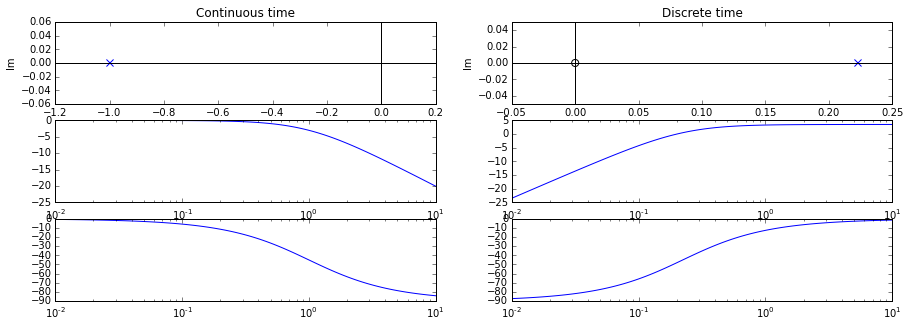

In [2]:
def zp(Ts,sys):
    n = sys.num
    d = sys.den
    sysd=find_sysd_ii(Ts,sys)
    print 'The continuous-time transfer function is :', sys
    print 'and the discrete-time transfer function is: ', sysd
    plt.subplot(3,2,1)
    zp_plot(sys)
    plt.title('Continuous time')
    plt.subplot(3,2,2)
    zp_plot(sysd)
    plt.title('Discrete time')
    
def bode_plot(Ts,sys):
    #continuous
    n = asarray(sys.num)[0][0]
    d = asarray(sys.den)[0][0]
    s = signal.lti(n,d)
    w, mag, phase = s.bode()
    plt.subplot(323)
    plt.semilogx(w, mag)
    plt.subplot(325)
    plt.semilogx(w, phase)
    #discrete
    sysd=find_sysd_ii(Ts,sys)
    nd = asarray(sysd.num)[0][0]
    dd = asarray(sysd.den)[0][0]
    sd = signal.lti(nd,dd)
    wd, magd, phased = sd.bode()
    plt.subplot(324)
    plt.semilogx(wd, magd)
    plt.subplot(326)
    plt.semilogx(wd, phased)

def draw(Ts):
    zp(Ts,sys)
    bode_plot(Ts,sys)

go = False
while go == False:
    Num,Denom = init()
    sys = TransferFunction(Num,Denom)
    print 'The transfer function is :', sys
    go = check()
interact(draw,Ts=(0.1,3,0.1))

# Step invariant method

In this method, the discrete-time transfer function is calculated as follows:
$$H_c(s)=(1-z^{-1})\mathcal{Z}\Big\{\frac{H(s)}{s}\Big\}$$

The continuous-time transfer function is : 
  1
-----
s + 1

and the discrete-time transfer function is:  
  0.7769
----------
z - 0.2231

dt = 1.5



<function __main__.draw>

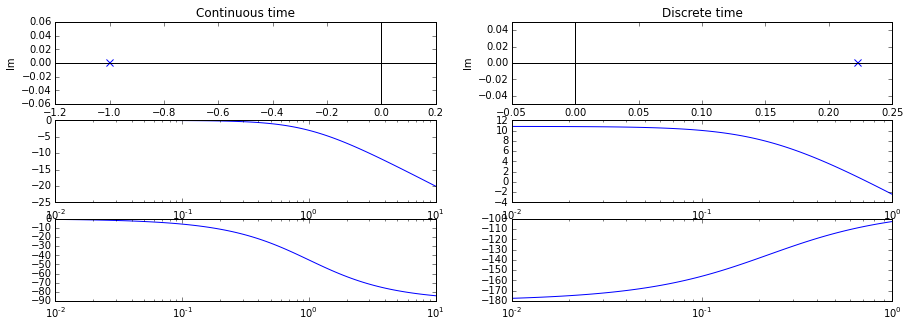

In [2]:
def zp(Ts,sys):
    sysd=sys.sample(Ts,'zoh')
    print 'The continuous-time transfer function is :', sys
    print 'and the discrete-time transfer function is: ', sysd
    plt.subplot(3,2,1)
    zp_plot(sys)
    plt.title('Continuous time')
    plt.subplot(3,2,2)
    zp_plot(sysd)
    plt.title('Discrete time')
    
def bode_plot(Ts,sys):
    #continuous
    n = asarray(sys.num)[0][0]
    d = asarray(sys.den)[0][0]
    s = signal.lti(n,d)
    w, mag, phase = s.bode()
    plt.subplot(323)
    plt.semilogx(w, mag)
    plt.subplot(325)
    plt.semilogx(w, phase)
    #discrete
    sysd=sys.sample(Ts,'zoh')
    nd = asarray(sysd.num)[0][0]
    dd = asarray(sysd.den)[0][0]
    sd = signal.lti(nd,dd)
    wd, magd, phased = sd.bode()
    plt.subplot(324)
    plt.semilogx(wd, magd)
    plt.subplot(326)
    plt.semilogx(wd, phased)

def draw(Ts):
    zp(Ts,sys)
    bode_plot(Ts,sys)

go = False
while go == False:
    Num,Denom = init()
    sys = TransferFunction(Num,Denom)
    print 'The transfer function is :', sys
    go = check()
interact(draw,Ts=(0.1,3,0.1))

# Zero-pole matching

In this method, for every pole $s = -a$ in the continuous-time transfer function, there is a pole $z=e^{-aT_s}$ in discrete time. Similarly, for every zero $s=-b$, there is a zero $z=e^{-bT_s}$ and for every zero $s=\infty$, there is a zero $z=-1$. The gain is calculated by demanding the following: $|H_c(s=0)| = |H_d(z=1)|$.

The continuous-time transfer function is : 
  1
-----
s + 1

and the discrete-time transfer function is:  
  0.7769
----------
s - 0.2231



<function __main__.draw>

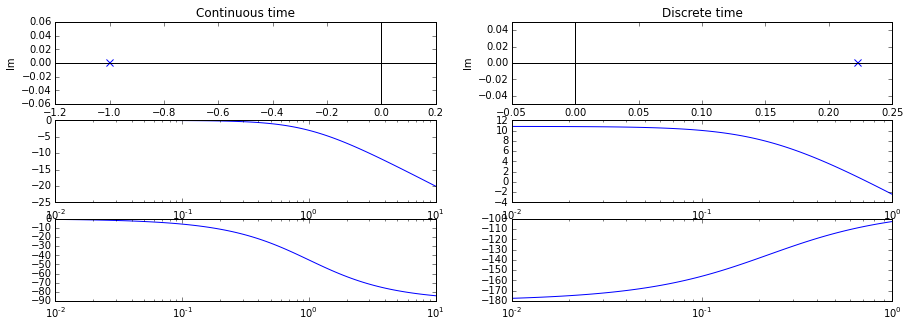

In [3]:
def zp(Ts,sys):
    sysd=find_sysd_zp(Ts,sys)
    print 'The continuous-time transfer function is :', sys
    print 'and the discrete-time transfer function is: ', sysd
    plt.subplot(3,2,1)
    zp_plot(sys)
    plt.title('Continuous time')
    plt.subplot(3,2,2)
    zp_plot(sysd)
    plt.title('Discrete time')
    
def bode_plot(Ts,sys):
    #continuous
    n = asarray(sys.num)[0][0]
    d = asarray(sys.den)[0][0]
    s = signal.lti(n,d)
    w, mag, phase = s.bode()
    plt.subplot(323)
    plt.semilogx(w, mag)
    plt.subplot(325)
    plt.semilogx(w, phase)
    #discrete
    sysd=find_sysd_zp(Ts,sys)
    nd = asarray(sysd.num)[0][0]
    dd = asarray(sysd.den)[0][0]
    sd = signal.lti(nd,dd)
    wd, magd, phased = sd.bode()
    plt.subplot(324)
    plt.semilogx(wd, magd)
    plt.subplot(326)
    plt.semilogx(wd, phased)

def draw(Ts):
    zp(Ts,sys)
    bode_plot(Ts,sys)

go = False
while go == False:
    Num,Denom = init()
    print 'n/d: ', Num, Denom
    sys = TransferFunction(Num,Denom)
    print 'The transfer function is :', sys
    go = check()
interact(draw,Ts=(0.1,3,0.1))